### Credit Card Customer Segmentation

## The Scenario
You are a data scientist working for a credit card company. You're asked to help segment a dataset containing information about the company’s clients 
into different groups to enable the company to apply different business strategies for each type of customer.

## The Dataset
The dataset is named [customer segmentation](https://www.kaggle.com/datasets/yasserh/customer-segmentation-customersset) and it can be downloaded from Kaggle. We have been told that the customers engineering team has already cleaned most of the customers so we can focus on building the best possible model to segment the customers. Also, in a planning meeting with the Data Science coordinator, it was decided that we should use the **`K-means`** algorithm to segment the data.

**It's worth noting that `k.means` is an `unsupervised` machine learning algorithm. In `segmentation` or `clustering`, all the columns are considered as features and there is no such thing as target.**

### Import the required libraries and modules

Here's the data dictionary:

- `customer_id`: unique identifier for each customer.
- `age`: customer age in years.
- `gender`: customer gender (M or F).
- `dependent_count`: number of dependents of each customer.
- `education_level`: level of education ("High School", "Graduate", etc.).
- `marital_status`: marital status ("Single", "Married", etc.).
- `estimated_income`: the estimated income for the customer projected by the data science team.
- `months_on_book`: time as a customer in months.
- `total_relationship_count`: number of times the customer contacted the company.
- `months_inactive_12_mon`: number of months the customer did not use the credit card in the last 12 months.
- `credit_limit`: customer's credit limit.
- `total_trans_amount`: the overall amount of money spent on the card by the customer.
- `total_trans_count`: the overall number of times the customer used the card.
- `avg_utilization_ratio`: daily average utilization ratio.

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [80]:
data =  "C:\Data Science\Test Data\customer_segmentation.csv"
customers = pd.read_csv(data)
print(customers.shape)
customers.head()

(10127, 14)


,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [81]:
customers.isna().sum()

customer_id                 0
age                         0
gender                      0
dependent_count             0
education_level             0
marital_status              0
estimated_income            0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
credit_limit                0
total_trans_amount          0
total_trans_count           0
avg_utilization_ratio       0
dtype: int64

In [82]:
customers.dtypes

customer_id                   int64
age                           int64
gender                       object
dependent_count               int64
education_level              object
marital_status               object
estimated_income              int64
months_on_book                int64
total_relationship_count      int64
months_inactive_12_mon        int64
credit_limit                float64
total_trans_amount            int64
total_trans_count             int64
avg_utilization_ratio       float64
dtype: object

In [83]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

In [84]:
customers.describe()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


In [85]:
customers.shape

(10127, 14)

Based on the descriptive statistics, here are some of the observations we can make:

- Categorical variables: There are several categorical varibales in the dataset, namely `'gender'`, `'education_level'` and `'marital_status'`, the rest are numerical variables
- There are no missing values


Text(0.5, 0, 'Age')

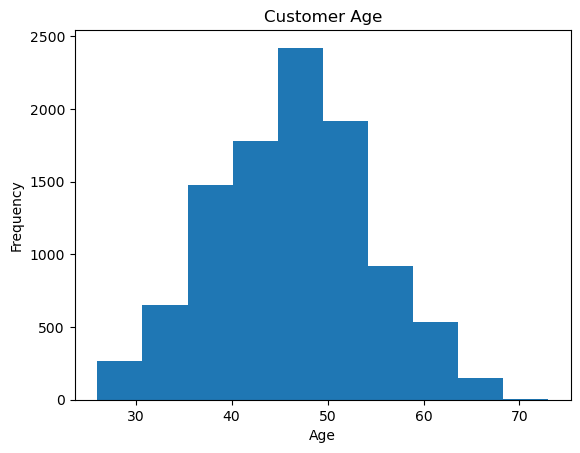

In [86]:
# lets perform some quick analysis of the data

customers.age.plot.hist()
plt.title('Customer Age')
plt.xlabel('Age')

In [87]:
age_stats = customers.age.describe()
age_stats

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: age, dtype: float64

In [88]:
print(f'The mean of the age of the customers: {age_stats["mean"]: .0f} years')
print(f'The median age of the customers: {age_stats["50%"]: .0f} years')
print(f'The Oldest customer: {age_stats["max"]: .0f} years')
print(f'The youngest customer: {age_stats["min"]: .0f} years')

The mean of the age of the customers:  46 years
The median age of the customers:  46 years
The Oldest customer:  73 years
The youngest customer:  26 years


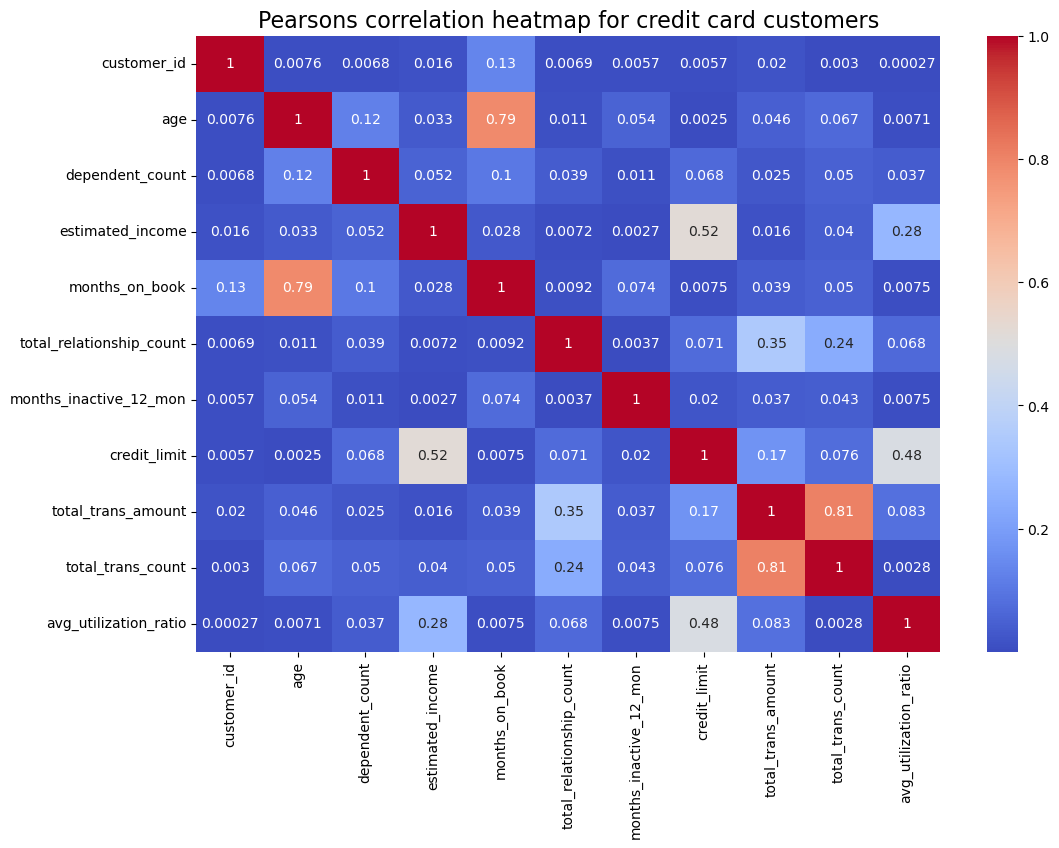

In [89]:
# create a pearson's correlation heatmap using seaborn
corr_mat = abs(customers.corr())

#  visulaize the data
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title('Pearsons correlation heatmap for credit card customers', fontsize=16)
plt.show()

## Correlation Analysis

The correlation matrix provides insights into the relationships between the numerical variables in the dataset. Here are some observations:

- Age and months on book have a strong positive correlation of `0.789`, indicating that older customers tend to have been customers for a longer duration.

- Credit limit and estimated income have a moderate positive correlation of `0.516`, suggesting that customers with higher estimated incomes tend to have higher credit limits.

- Total transaction amount and total transaction count have a strong positive correlation of `0.807`, indicating that customers who make more transactions tend to have higher transaction amounts.

- Credit limit and average utilization ratio have a moderate negative correlation of `-0.483`, suggesting that customers with higher credit limits tend to have lower average utilization ratios.

- Total relationship count and total transaction amount have a negative correlation of `-0.347`, indicating that customers with more relationships with the company tend to have lower transaction amounts.

It's important to note that correlation does not imply causation, and further analysis is required to understand the underlying relationships between the variables.


ValueError: num must be an integer with 1 <= num <= 9, not 10

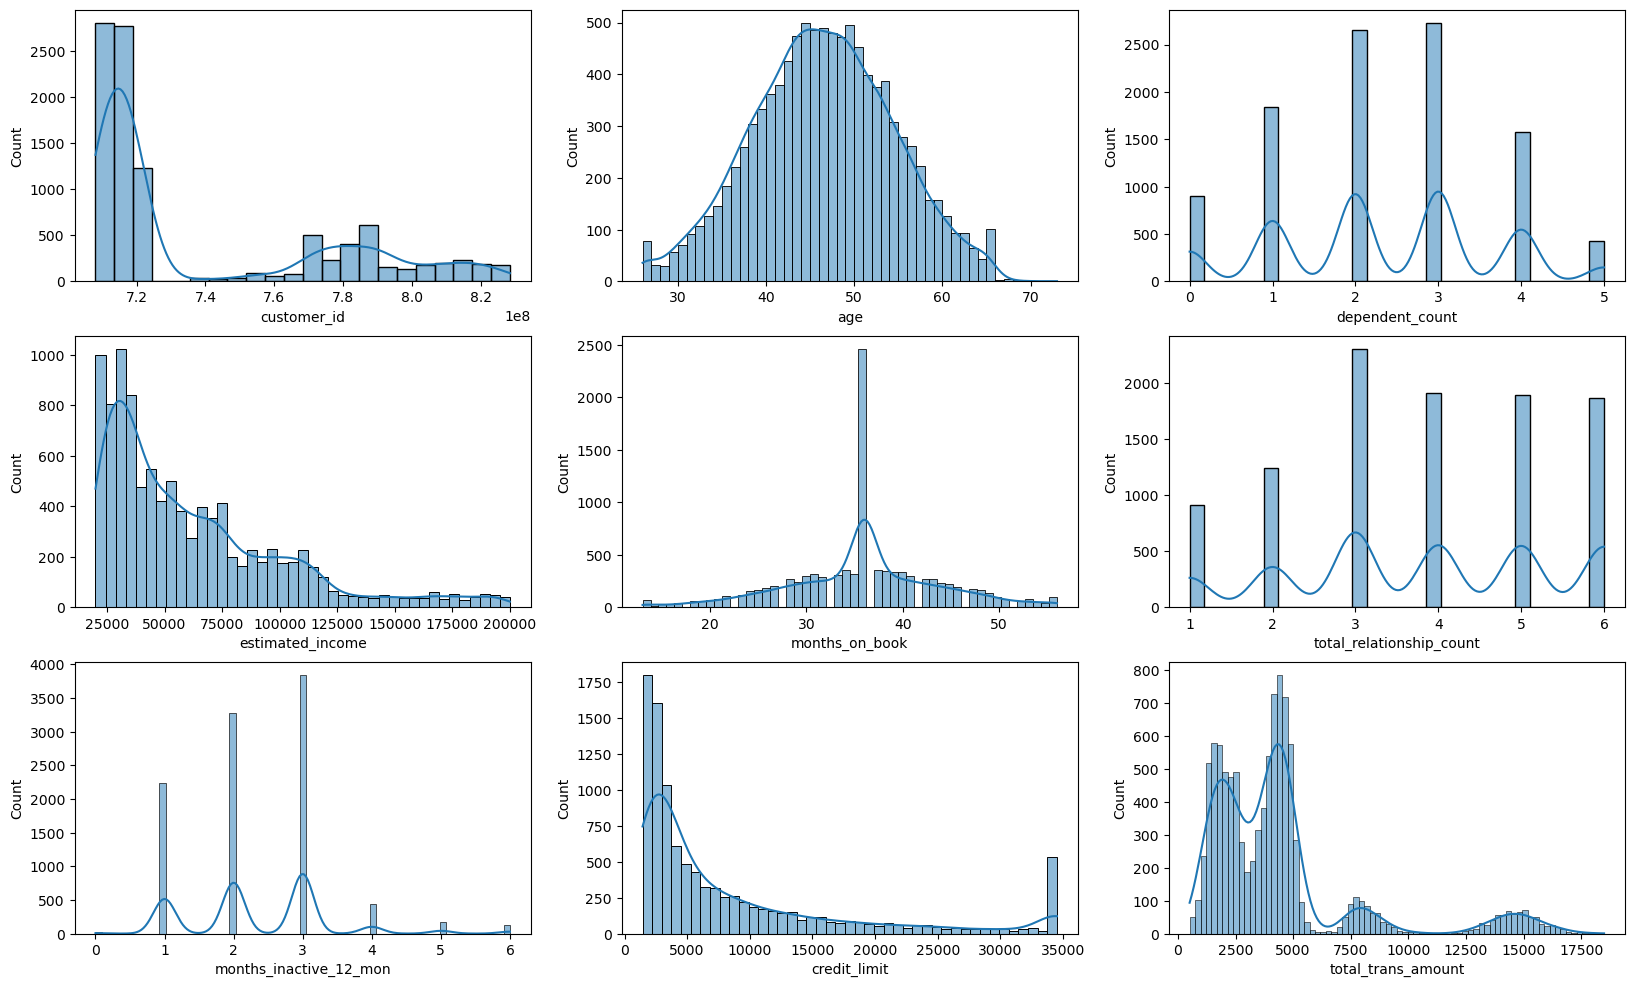

In [90]:
# Select numeric columns for plotting
numeric_columns = customers.select_dtypes(include=[np.number])

# Plot the distributions
plt.figure(figsize=(20, 12))
for i, column in enumerate(numeric_columns.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(customers[column], kde=True)
    
plt.tight_layout()
plt.show()

Here are some relevant insights gathered from the histograms:
- The largest number of customers fall between the ages of 40 to 50
- The most common number of dependants is around 1
- the range of estimated income varies widely, with the most common range between 20,000 to 24,000. the distribution is left skewed showing most customers have low incomes 
- The most common range for months on book is 30 to 40
- The most common relationship coumts falls between 3 to 6 with the average being 3
- The highest frequency for months inactive is observed to be between 2 to 3 months with 3 months being the highest
- the distribution for the credit card limit is left skewed, with the majority of customers having a credit card limit between 2,500 to 15,00 with gradual decrease in the frequency as the credit card limit increases
- The range for the total transaction amount falls between 1,500 to 5,000 with the highest being around 4,500

These observations provided insights into the distribtion of the frequencies of the variables


## Feature Engineering

Let's start dealing with the categorical columns. There are three of them: gender, education level, and marital status.

First, let's check on the gender and education_level columns.

The gender column contains only 2 unique values, "M" and "F", which means it's possible to replace all the rows with 1 and 0.

The education_level column contains 6 unique values. This column represents levels of education, and it's possible to rank the levels from the lowest to the highest, so it's possible to replace each unique level with a number, assuming we respect the order.

In [92]:
# Create a copy of the original DataFrame
customers_modif = customers.copy()

# Replace the values in the gender column with 1 for "M" and 0 for "F"
customers_modif['gender'] = customers_modif['gender'].map({'M': 1, 'F': 0})

# Replace the values in the education_level column
education_mapping = {
        'Uneducated': 0,
        'High School': 1,
        'College': 2,
        'Graduate': 3,
        'Post-Graduate': 4,
        'Doctorate': 5
}

customers_modif['education_level'] = customers_modif['education_level'].map(education_mapping)

To deal with the marital status column we'll use one-hot encoding

In [94]:
# Use one-hot encoding to create dummy variables for the marital_status column
marital_status_dummies = pd.get_dummies(customers_modif['marital_status'], prefix='marital', drop_first=True)

# Combine the new DataFrame with the original
customers_modif = pd.concat([customers_modif, marital_status_dummies], axis=1)

# Drop the original marital_status column
customers_modif = customers_modif.drop('marital_status', axis=1)

In [95]:
customers_modif

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_Married,marital_Single,marital_Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,1,0,0
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,1,0
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,1,0,0
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,1
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,1,2,3,51000,40,3,2,4003.0,15476,117,0.462,0,1,0
10123,710638233,41,1,2,3,40000,25,4,2,4277.0,8764,69,0.511,0,0,0
10124,716506083,44,0,1,1,33000,36,5,3,5409.0,10291,60,0.000,1,0,0
10125,717406983,30,1,2,3,47000,36,4,3,5281.0,8395,62,0.000,0,0,1


### Scaling the data

Note that we have different scaled data across the DataFrame. The estimated_income, for instance, contains numbers in the range of dozens and hundreds of thousands, while the dependent_count column contains numbers from 1 to 5.

At this point of the project we need to transform the data so it's all on the same scale.

1. Create a new DataFrame without the column `customer_id`.
2. Instantiate an object from the scikit-learn's StandardScaler() class and fit it to the new DataFrame.
3. Use the transform method to scale the data. Assign it to a different variable and print it.
4. Convert the scaled data back to a DataFrame using pd.DataFrame().

In [102]:
from sklearn.preprocessing import StandardScaler

# create a new dataframe without the cutsomer id
customers_scaled = customers_modif.drop('customer_id', axis=1)

scaler = StandardScaler()

scaler.fit(customers_scaled)

customers_scaled = scaler.transform(customers_scaled)

customers_scaled = pd.DataFrame(customers_scaled, columns=customers_modif.columns[1:])

customers_scaled

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_Married,marital_Single,marital_Unknown
0,-0.165406,1.059956,0.503368,-0.752211,0.175810,0.384621,0.763943,-1.327136,0.446622,-0.959707,-0.973895,-0.775882,1.077338,-0.798507,-0.282609
1,0.333570,-0.943436,2.043199,0.662787,-0.967166,1.010715,1.407306,-1.327136,-0.041367,-0.916433,-1.357340,-0.616276,-0.928214,1.252337,-0.282609
2,0.583058,1.059956,0.503368,0.662787,0.785397,0.008965,0.120579,-1.327136,-0.573698,-0.740982,-1.911206,-0.997155,1.077338,-0.798507,-0.282609
3,-0.789126,-0.943436,1.273283,-0.752211,-0.636973,-0.241473,-0.522785,1.641478,-0.585251,-0.951758,-1.911206,1.759686,-0.928214,-0.798507,3.538459
4,-0.789126,1.059956,0.503368,-1.459710,0.074212,-1.869317,0.763943,-1.327136,-0.430877,-1.056263,-1.570365,-0.997155,1.077338,-0.798507,-0.282609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.458314,1.059956,-0.266547,0.662787,-0.281380,0.509840,-0.522785,-0.337598,-0.509330,3.259358,2.221481,0.678714,-0.928214,1.252337,-0.282609
10123,-0.664382,1.059956,-0.266547,0.662787,-0.560775,-1.368442,0.120579,-0.337598,-0.479181,1.283475,0.176440,0.856458,-0.928214,-0.798507,-0.282609
10124,-0.290150,-0.943436,-1.036462,-0.752211,-0.738571,0.008965,0.763943,0.651940,-0.354626,1.732994,-0.207005,-0.997155,1.077338,-0.798507,-0.282609
10125,-2.036565,1.059956,-0.266547,0.662787,-0.382978,0.008965,0.120579,0.651940,-0.368710,1.174848,-0.121795,-0.997155,-0.928214,-0.798507,3.538459


## Choosing K

Now our dataset is ready for machine learning. The next step is to decide the best number of clusters to use in the segmentation according to the inertia metric.

We'll have to create several models and compute the inertia from each of them. Then, we'll be able to plot the Elbow Curve and decide the number of clusters we'll use to segment the customers. Once we do all that, we can perform the real clusterization.

1. Create an empty list to store the inertia from every model.
2. Use a for loop to iterate over different numbers of clusters, such as ranging from 2 to 10.
3. For each number of clusters (K) in the loop:
   - Instantiate a KMeans object and set the number of clusters (n_clusters) to K.
   - Use the `fit_predict()` method to create the clusters based on the scaled data.
   - Append the `inertia_` attribute of the model to the empty list.
4. Use the list of inertia values to plot the Elbow Curve. The Elbow Curve is a plot of the number of clusters (K) against the inertia. It helps us visualize the trade-off between the number of clusters and the distortion within each cluster. The "elbow" point in the curve indicates the optimal number of clusters where adding more clusters does not significantly improve the inertia.
5. Based on the shape of the Elbow Curve, decide the number of clusters to use for segmenting the customers. This decision should be made by identifying the point in the curve where adding more clusters does not lead to a substantial decrease in inertia.
6. Instantiate a new KMeans object with the decided number of clusters as K.
7. Use the `fit_predict()` method on the scaled data to create the final clusters.
8. Print the outcome, which represents the cluster labels assigned to each data point.

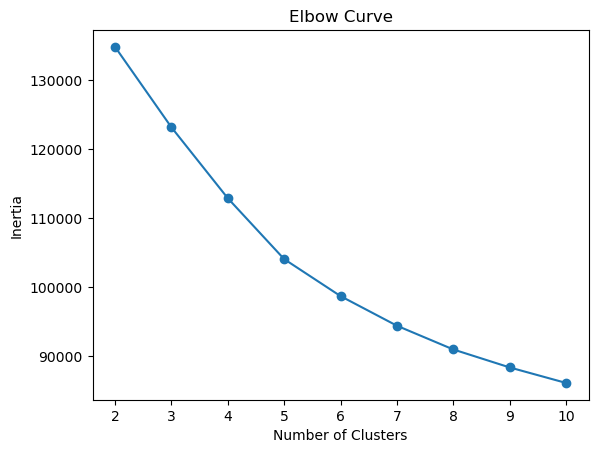

Number of Clusters: 6
[0 2 0 ... 1 4 1]


In [109]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Empty list to store inertia
inertia = []

# Loop through different numbers of clusters
for k in range(2,11):
    # Instantiate KMeans with n_clusters=k
    model = KMeans(n_clusters=k)
    
    # Fit the model and create clusters
    cluster = model.fit_predict(customers_scaled)
    
    # Append the inertia to the list
    inertia.append(model.inertia_)

# Plot the elbow curve
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

# Based on the elbow curve, decide the number of clusters
num_clusters = 6
print(f"Number of Clusters: {num_clusters}")

# Instantiate KMeans with the decided number of clusters
kmeans_final = KMeans(n_clusters=num_clusters)

# Fit the model and create clusters
final_clusters = kmeans_final.fit_predict(customers_scaled)

# Print the outcome
print(final_clusters)


Now it's time to analyze the results of the clustering algorithm and understand the characteristics of each cluster. By examining the variables used in the clustering and their distribution within each cluster, we can gain insights into the different customer segments and make business suggestions accordingly.


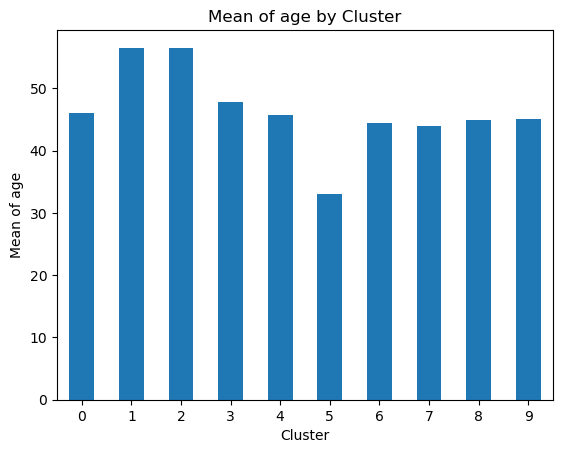

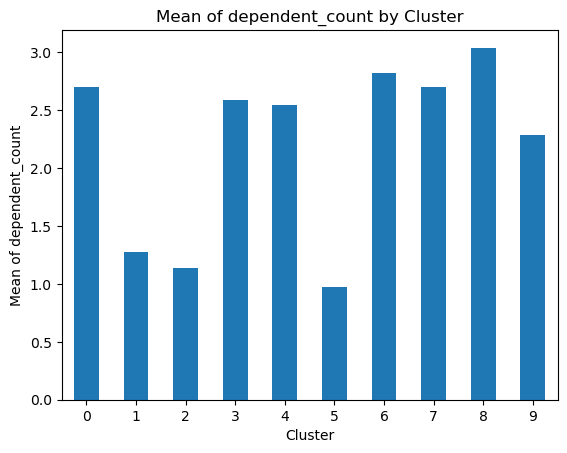

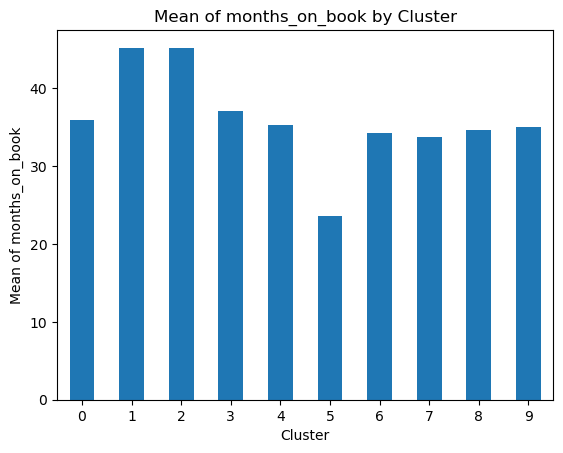

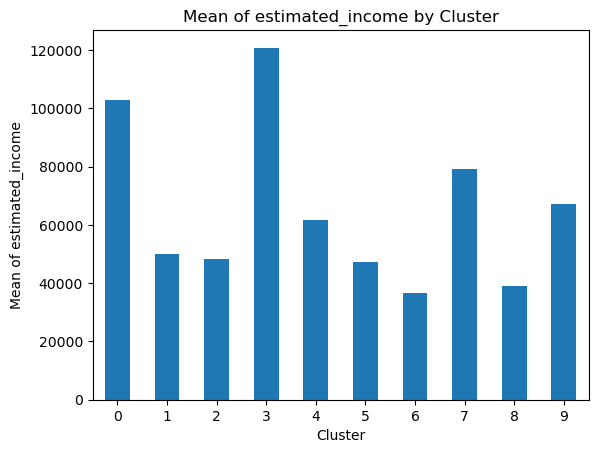

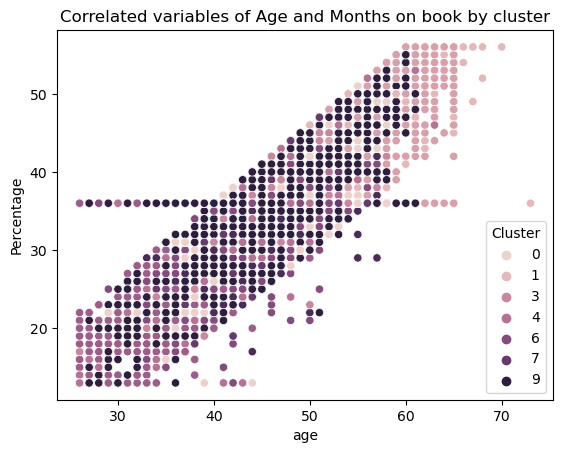

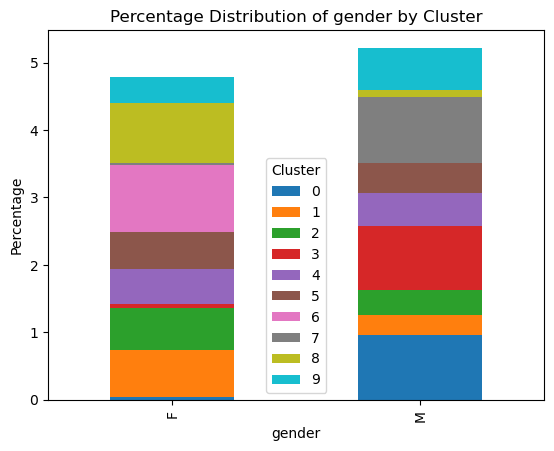

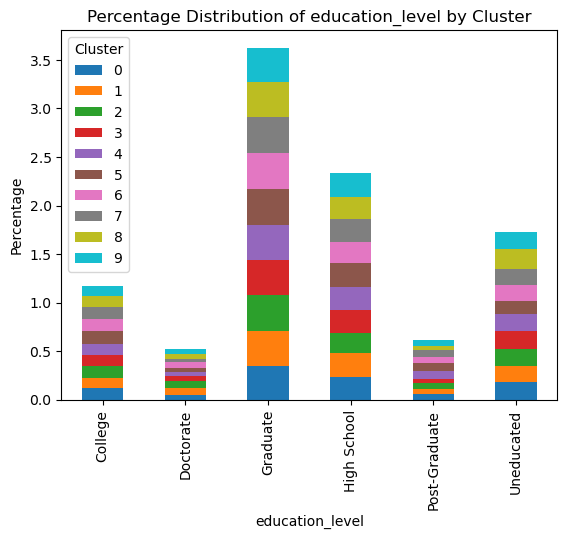

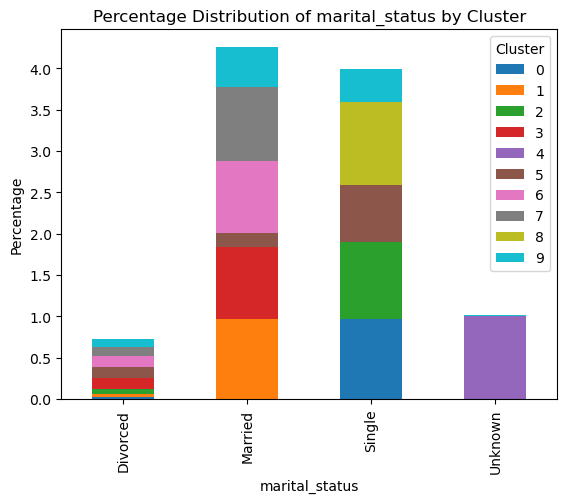

In [114]:
customers['CLUSTER'] = model.labels_

# Group each numeric variable by the CLUSTER column and plot a bar chart.
numeric_var = ['age', 'dependent_count', 'months_on_book', 'estimated_income']

for var in numeric_var:
    grouped = customers.groupby('CLUSTER')[var].mean()
    grouped.plot(kind='bar', title=f'Mean of {var} by Cluster', rot=0)
    plt.xlabel('Cluster')
    plt.ylabel(f'Mean of {var}')
    plt.show()

# create scatter plot for highly correlated variables
corr_var = ['age', 'months_on_book']
sns.scatterplot(data=customers, x=corr_var[0], y=corr_var[1], hue='CLUSTER')
plt.title('Correlated variables of Age and Months on book by cluster')
plt.xlabel(corr_var[0])
plt.ylabel('Percentage')
plt.legend(title='Cluster')
plt.show()

# Calculate percentage distribution of categorical variables per cluster
categorical_vars = ['gender', 'education_level', 'marital_status']
for var in categorical_vars:
    crosstab = pd.crosstab(customers[var], customers['CLUSTER'], normalize='columns')
    crosstab.plot(kind='bar', stacked=True)
    plt.title(f'Percentage Distribution of {var} by Cluster')
    plt.xlabel(var)
    plt.ylabel('Percentage')
    plt.legend(title='Cluster')
    plt.show()


**Cluster 0:**
- Main Characteristics: Customers in this cluster have an average age of around 46 years. They have a moderate number of dependents and an estimated income of approximately $61,352. The majority of customers in this cluster have an unknown marital status.
- Differences from other clusters: Cluster 0 is characterized by customers with an unknown marital status and a relatively moderate income level.
- Business suggestion: Since the majority of customers in this cluster have an unknown marital status, it would be beneficial to conduct targeted marketing campaigns to understand their needs and preferences better. Additionally, efforts can be made to collect data on their marital status to further personalize marketing strategies.

**Cluster 1:**
- Main Characteristics: Customers in this cluster have an average age of around 56 years. They have a low number of dependents and an estimated income of approximately $48,626. The majority of customers in this cluster are married.
- Differences from other clusters: Cluster 1 is characterized by older customers with a lower number of dependents and a lower income level compared to other clusters.
- Business suggestion: Considering the older age demographic in this cluster, marketing strategies can focus on products and services that cater to the needs and preferences of mature customers. Additionally, targeting married individuals with relevant offers and promotions can be effective.

**Cluster 2:**
- Main Characteristics: Customers in this cluster have an average age of around 33 years. They have a relatively low number of dependents and an estimated income of approximately $45,370. The majority of customers in this cluster are divorced.
- Differences from other clusters: Cluster 2 is characterized by younger customers with a lower income level and a higher proportion of divorced individuals.
- Business suggestion: Recognizing the younger age group in this cluster, marketing campaigns can be tailored to appeal to their specific interests and lifestyle. Offering financial and banking solutions that cater to the needs of divorced individuals may also be beneficial.

**Cluster 3:**
- Main Characteristics: Customers in this cluster have an average age of around 47 years. They have a high number of dependents and an estimated income of approximately $122,827. The majority of customers in this cluster are divorced.
- Differences from other clusters: Cluster 3 is characterized by customers with a higher number of dependents and a significantly higher income level compared to other clusters.
- Business suggestion: With the higher income level and larger number of dependents, this cluster represents an opportunity for offering comprehensive financial planning and investment services. Targeted marketing efforts can focus on providing solutions for the financial well-being of divorced individuals with families.

**Cluster 4:**
- Main Characteristics: Customers in this cluster have an average age of around 45 years. They have a moderate number of dependents and an estimated income of approximately $36,863. The majority of customers in this cluster are married.
- Differences from other clusters: Cluster 4 is characterized by customers with a relatively lower income level compared to other clusters.
- Business suggestion: Recognizing the lower income level in this cluster, marketing strategies can focus on affordable financial solutions, budgeting tools, and tailored offers to attract and retain customers. Providing value-added services with competitive pricing can be beneficial.

**Cluster 5:**
- Main Characteristics: Customers in this cluster have an average age of around 45 years. They have a moderate number of dependents and an estimated income of approximately $84,473. The majority of customers in this cluster are single.
- Differences from other clusters: Cluster 5 is characterized by customers who are predominantly single and have a higher income level compared to other clusters.
- Business suggestion: With the higher income level and a focus on single individuals, marketing campaigns can target lifestyle-oriented financial products and services. Providing personalized financial planning solutions and investment opportunities can be attractive to this segment.

**Cluster 6:**
- Main Characteristics: Customers in this cluster have an average age of around 44 years. They have a moderate number of dependents and an estimated income of approximately $36,973. The majority of customers in this cluster are single.
- Differences from other clusters: Cluster 6 is characterized by customers with a relatively lower income level and a higher proportion of single individuals.
- Business suggestion: Recognizing the lower income level and single status in this cluster, marketing strategies can focus on offering affordable financial solutions, savings and investment options, and tailored offers to address the specific needs and aspirations of single individuals.

**Cluster 7:**
- Main Characteristics: Customers in this cluster have an average age of around 46 years. They have a moderate number of dependents and an estimated income of approximately $91,324. The majority of customers in this cluster are married.
- Differences from other clusters: Cluster 7 is characterized by customers with a relatively higher income level compared to other clusters.
- Business suggestion: With the higher income level and the majority being married individuals, marketing campaigns can focus on offering comprehensive financial solutions for families. This can include family savings plans, educational investment options, and tailored services for married couples.

**Cluster 8:**
- Main Characteristics: Customers in this cluster have an average age of around 45 years. They have a lower number of dependents and an estimated income of approximately $67,001. The majority of customers in this cluster are married.
- Differences from other clusters: Cluster 8 is characterized by customers with a lower number of dependents and a moderate income level.
- Business suggestion: Marketing efforts can focus on offering products and services that cater to the specific needs of individuals with a lower number of dependents. This can include personalized financial planning, retirement solutions, and insurance options tailored for smaller households.

**Cluster 9:**
- Main Characteristics: Customers in this cluster have an average age of around 57 years. They have a very low number of dependents and an estimated income of approximately $46,911. The majority of customers in this cluster are single.
- Differences from other clusters: Cluster 9 is characterized by older customers with a very low number of dependents and a lower income level compared to other clusters.
- Business suggestion: With the focus on older customers and single individuals, marketing campaigns can target retirement planning, individual investment solutions, and tailored financial products for the specific needs and aspirations of this segment.

